In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

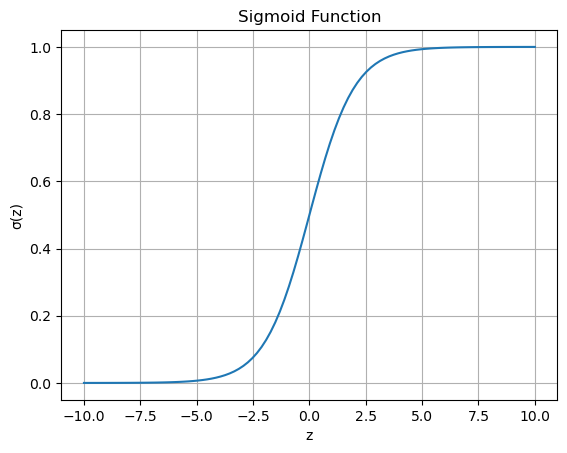

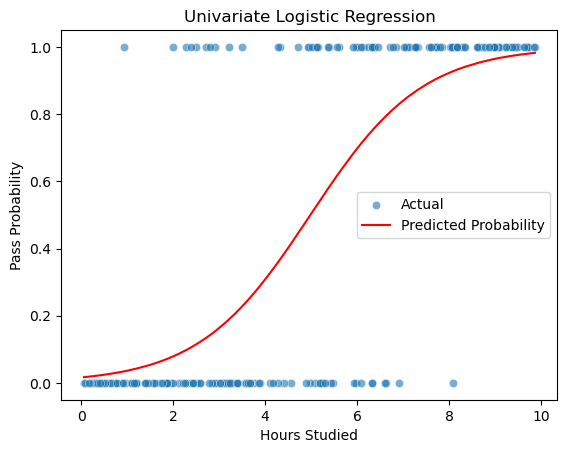

Accuracy: 0.84

Confusion Matrix:
 [[87 17]
 [15 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       104
           1       0.83      0.84      0.84        96

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
 #1) Predict whether a student passes an exam (pass/fail) based on hours studied.
np.random.seed(42)  # For reproducibility
hours = np.random.uniform(0, 10, 200)  # Hours studied between 0–10
logits = -4 + 0.8 * hours
prob = 1 / (1 + np.exp(-logits))       # Sigmoid transformation
pass_exam = np.random.binomial(1, prob)
data = pd.DataFrame({
    "Hours_Studied": hours,
    "Pass": pass_exam
})
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()
X = data["Hours_Studied"].values.reshape(-1, 1)
y = data["Pass"].values
model = LogisticRegression()
model.fit(X, y)

data["Predicted_Prob"] = model.predict_proba(X)[:, 1]
data["Predicted_Class"] = model.predict(X)
sns.scatterplot(x="Hours_Studied", y="Pass", data=data, alpha=0.6, label="Actual")
sns.lineplot(x="Hours_Studied", y="Predicted_Prob", data=data, color="red", label="Predicted Probability")
plt.title("Univariate Logistic Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Pass Probability")
plt.legend()
plt.show()

print("Accuracy:", accuracy_score(y, data["Predicted_Class"]))
print("\nConfusion Matrix:\n", confusion_matrix(y, data["Predicted_Class"]))
print("\nClassification Report:\n", classification_report(y, data["Predicted_Class"]))




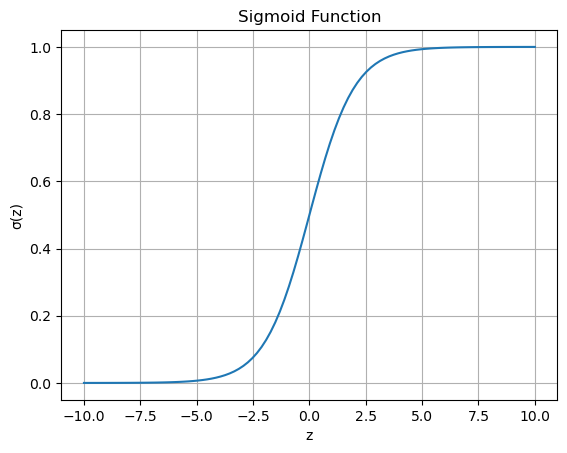

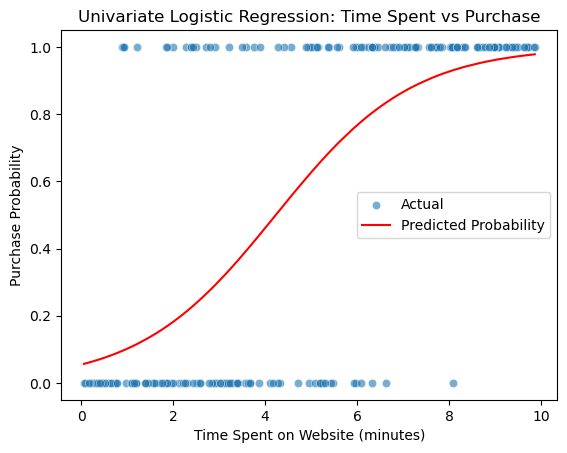

Accuracy: 0.81

Confusion Matrix:
 [[72 18]
 [20 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        90
           1       0.83      0.82      0.83       110

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
#2.2) Predict whether a customer buys a product (yes/no) based on time spent on website.
np.random.seed(42)
time_spent = np.random.uniform(0, 10, 200)
logits = -3 + 0.7 * time_spent
prob = 1 / (1 + np.exp(-logits))
purchase = np.random.binomial(1, prob)
data = pd.DataFrame({
    "time_spent": time_spent,
    "buys": purchase
})

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

X = data["time_spent"].values.reshape(-1, 1)
y = data["buys"].values
model = LogisticRegression()
model.fit(X, y)
data["Predicted_Prob"] = model.predict_proba(X)[:, 1]
data["Predicted_customer"] = model.predict(X)
sns.scatterplot(x="time_spent", y="buys", data=data, alpha=0.6, label="Actual")
sns.lineplot(x="time_spent", y="Predicted_Prob", data=data, color="red", label="Predicted Probability")
plt.title("Univariate Logistic Regression: Time Spent vs Purchase")
plt.xlabel("Time Spent on Website (minutes)")
plt.ylabel("Purchase Probability")
plt.legend()
plt.show()

print("Accuracy:", accuracy_score(y, data["Predicted_customer"]))
print("\nConfusion Matrix:\n", confusion_matrix(y, data["Predicted_customer"]))
print("\nClassification Report:\n", classification_report(y, data["Predicted_customer"]))



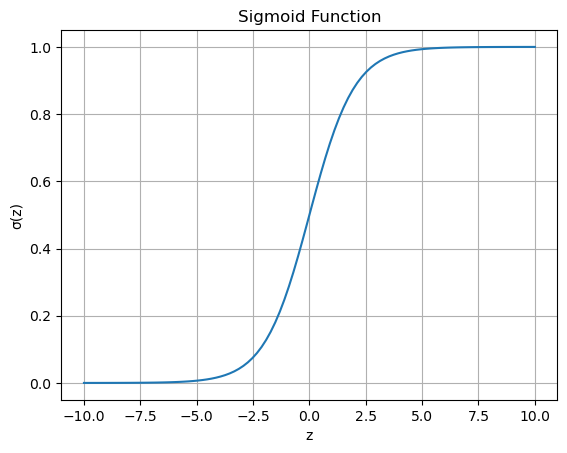

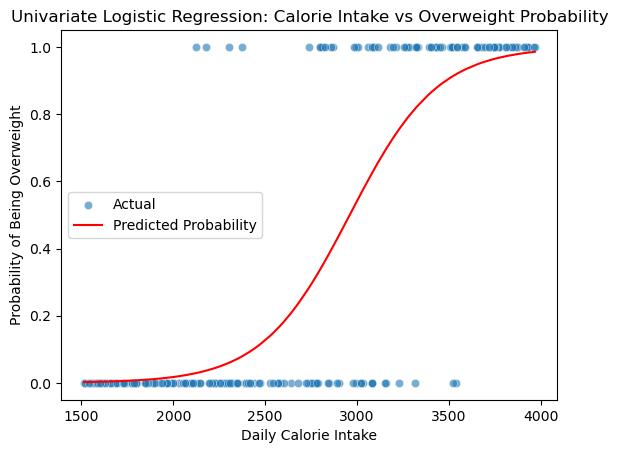

Accuracy: 0.87

Confusion Matrix:
 [[106  14]
 [ 12  68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       120
           1       0.83      0.85      0.84        80

    accuracy                           0.87       200
   macro avg       0.86      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [ ]:
# 3) Predict Overweight based on Daily Calorie Intake
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----- 1. Generate synthetic data -----
np.random.seed(42)  # for reproducibility

# Daily calorie intake between 1500 and 4000 kcal
calories = np.random.uniform(1500, 4000, 200)

# Linear equation: z = β0 + β1 * x
beta_0 = -12
beta_1 = 0.004
z = beta_0 + beta_1 * calories

# Apply sigmoid to get probabilities
prob = 1 / (1 + np.exp(-z))

# Generate binary outcomes (1 = overweight, 0 = not overweight)
overweight = np.random.binomial(1, prob)

# Create a DataFrame
data = pd.DataFrame({
    "Calories": calories,
    "Overweight": overweight
})

# ----- 2. Define sigmoid function -----
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Visualize sigmoid curve
z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

# ----- 3. Prepare data for model -----
X = data["Calories"].values.reshape(-1, 1)
y = data["Overweight"].values

# ----- 4. Train Logistic Regression model -----
model = LogisticRegression()
model.fit(X, y)

# ----- 5. Predictions -----
data["Predicted_Prob"] = model.predict_proba(X)[:, 1]
data["Predicted_Class"] = model.predict(X)

# ----- 6. Visualization -----
sns.scatterplot(x="Calories", y="Overweight", data=data, alpha=0.6, label="Actual")
sns.lineplot(x="Calories", y="Predicted_Prob", data=data, color="red", label="Predicted Probability")
plt.title("Univariate Logistic Regression: Calorie Intake vs Overweight Probability")
plt.xlabel("Daily Calorie Intake")
plt.ylabel("Probability of Being Overweight")
plt.legend()
plt.show()

# ----- 7. Model Evaluation -----
print("Accuracy:", accuracy_score(y, data["Predicted_Class"]))
print("\nConfusion Matrix:\n", confusion_matrix(y, data["Predicted_Class"]))
print("\nClassification Report:\n", classification_report(y, data["Predicted_Class"]))


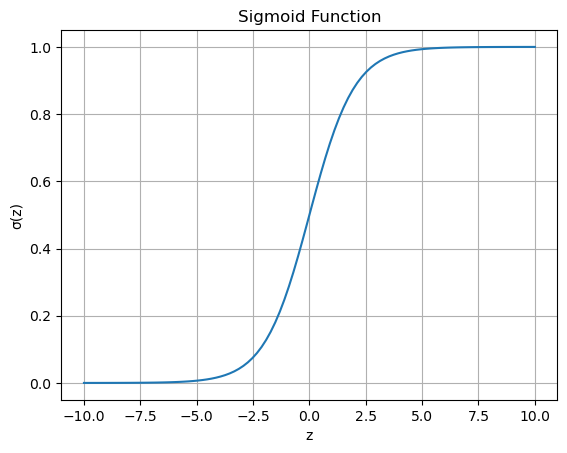

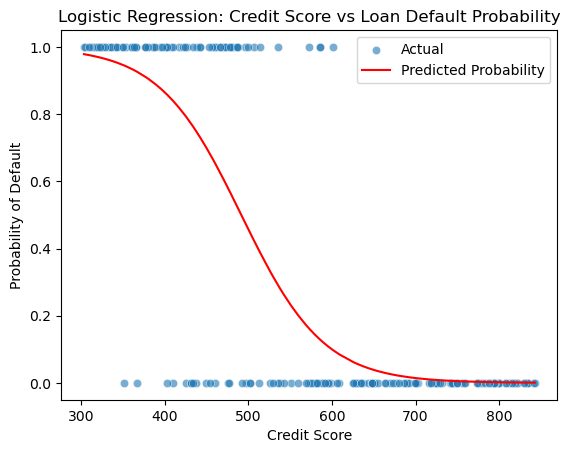

Accuracy: 0.885

Confusion Matrix:
 [[110  14]
 [  9  67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       124
           1       0.83      0.88      0.85        76

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [ ]:
# 4) Predict Loan Default based on Credit Score
# ----- 0. Import libraries -----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----- 1. Generate synthetic data -----
np.random.seed(42)  # for reproducibility

# Generate 200 random credit scores between 300 and 850
score = np.random.uniform(300, 850, 200)

# Define linear equation: z = β0 + β1 * x
beta_0 = 10      # intercept
beta_1 = -0.02   # coefficient for credit score
z = beta_0 + beta_1 * score

# Apply sigmoid to get probability of default
prob_default = 1 / (1 + np.exp(-z))

# Generate binary default outcome (1 = default, 0 = no default)
default = np.random.binomial(1, prob_default)

# Create a DataFrame
data = pd.DataFrame({
    "Credit_Score": score,
    "Default": default,
    "Prob_Default": prob_default
})

# ----- 2. Define sigmoid function -----
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Visualize sigmoid curve
z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

X = data["Credit_Score"].values.reshape(-1, 1)
y = data["Default"].values

model = LogisticRegression()
model.fit(X, y)

data["Predicted_Prob"] = model.predict_proba(X)[:, 1]
data["Predicted_Class"] = model.predict(X)

sns.scatterplot(x="Credit_Score", y="Default", data=data, alpha=0.6, label="Actual")
sns.lineplot(x="Credit_Score", y="Predicted_Prob", data=data, color="red", label="Predicted Probability")
plt.title("Logistic Regression: Credit Score vs Loan Default Probability")
plt.xlabel("Credit Score")
plt.ylabel("Probability of Default")
plt.legend()
plt.show()

print("Accuracy:", accuracy_score(y, data["Predicted_Class"]))
print("\nConfusion Matrix:\n", confusion_matrix(y, data["Predicted_Class"]))
print("\nClassification Report:\n", classification_report(y, data["Predicted_Class"]))



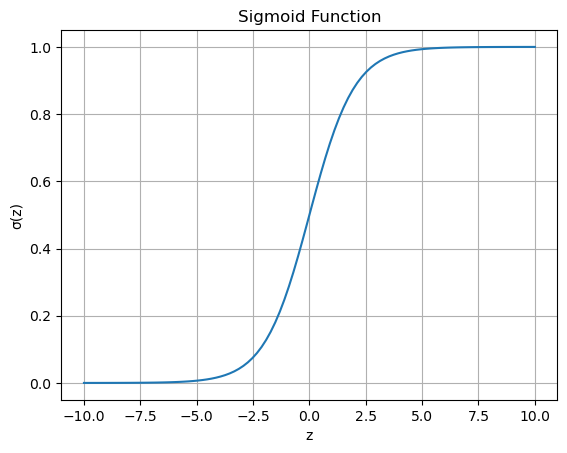

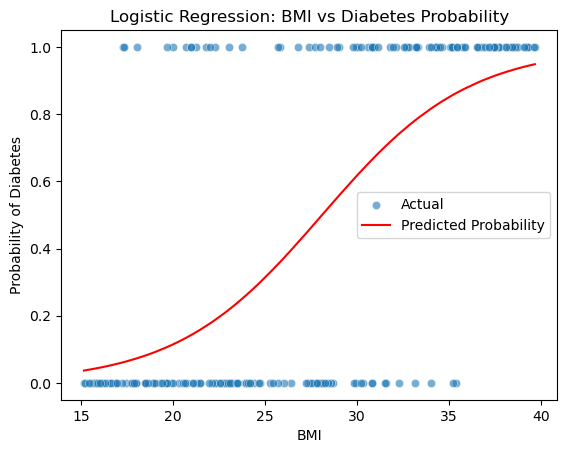

Accuracy: 0.81

Confusion Matrix:
 [[90 18]
 [20 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       108
           1       0.80      0.78      0.79        92

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
#5. Predict whether a patient has diabetes (yes/no) based on BMI
# ----- 0. Import Libraries -----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----- 1. Generate Synthetic Data -----
np.random.seed(42)  # reproducibility

# Generate BMI values (range 15 to 40)
bmi = np.random.uniform(15, 40, 200)

# Define linear relationship: logits = β0 + β1 * BMI
beta_0 = -7
beta_1 = 0.25
logits = beta_0 + beta_1 * bmi

prob = 1 / (1 + np.exp(-logits))

diabetes = np.random.binomial(1, prob)

data = pd.DataFrame({
    "BMI": bmi,
    "Diabetes": diabetes,
    "Prob_Diabetes": prob
})

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Visualize sigmoid curve
z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

X = data["BMI"].values.reshape(-1, 1)
y = data["Diabetes"].values

model = LogisticRegression()
model.fit(X, y)

data["Predicted_Prob"] = model.predict_proba(X)[:, 1]
data["Predicted_Class"] = model.predict(X)

sns.scatterplot(x="BMI", y="Diabetes", data=data, alpha=0.6, label="Actual")
sns.lineplot(x="BMI", y="Predicted_Prob", data=data, color="red", label="Predicted Probability")
plt.title("Logistic Regression: BMI vs Diabetes Probability")
plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.legend()
plt.show()

print("Accuracy:", accuracy_score(y, data["Predicted_Class"]))
print("\nConfusion Matrix:\n", confusion_matrix(y, data["Predicted_Class"]))
print("\nClassification Report:\n", classification_report(y, data["Predicted_Class"]))


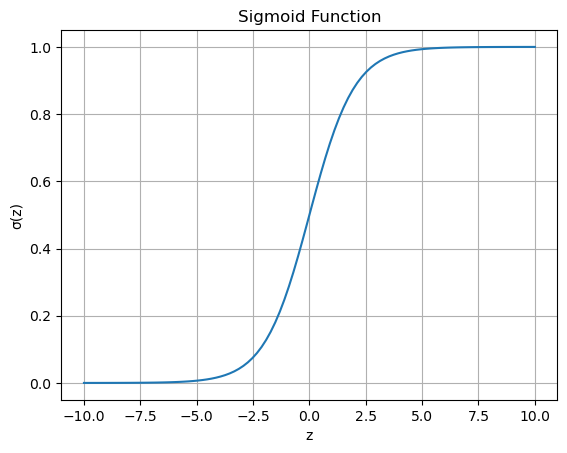

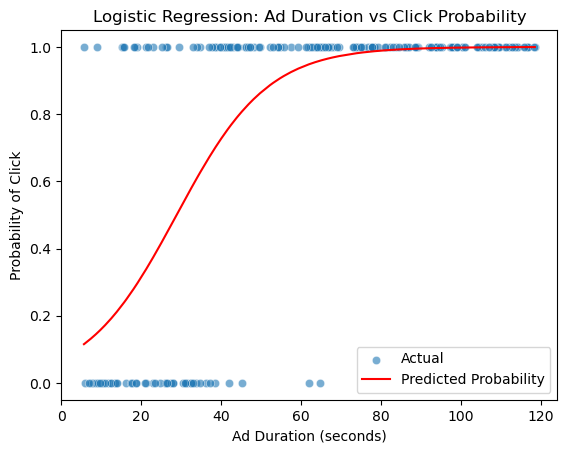

Accuracy: 0.85

Confusion Matrix:
 [[ 32  16]
 [ 14 138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        48
           1       0.90      0.91      0.90       152

    accuracy                           0.85       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.85      0.85      0.85       200



In [ ]:
#6) You are asked to model whether a user clicks on an online advertisement based on the duration of the ad they watched.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)

durated = np.random.uniform(5, 120, 200)

logits = -2 + 0.08 * durated

prob = 1 / (1 + np.exp(-logits))

click = np.random.binomial(n=1, p=prob)

# Create DataFrame
data = pd.DataFrame({
    "Ad_Duration": durated,
    "Prob_Click": prob,
    "Click": click
})

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Visualize the Sigmoid Function
z_vals = np.linspace(-10, 10, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

# ----- 3. Prepare Data for Logistic Regression -----
X = data["Ad_Duration"].values.reshape(-1, 1)
y = data["Click"].values

# ----- 4. Train Logistic Regression Model -----
model = LogisticRegression()
model.fit(X, y)

# ----- 5. Predictions -----
data["Predicted_Prob"] = model.predict_proba(X)[:, 1]
data["Predicted_Class"] = model.predict(X)

# ----- 6. Visualization -----
sns.scatterplot(x="Ad_Duration", y="Click", data=data, alpha=0.6, label="Actual")
sns.lineplot(x="Ad_Duration", y="Predicted_Prob", data=data, color="red", label="Predicted Probability")
plt.title("Logistic Regression: Ad Duration vs Click Probability")
plt.xlabel("Ad Duration (seconds)")
plt.ylabel("Probability of Click")
plt.legend()
plt.show()

# ----- 7. Model Evaluation -----
print("Accuracy:", accuracy_score(y, data["Predicted_Class"]))
print("\nConfusion Matrix:\n", confusion_matrix(y, data["Predicted_Class"]))
print("\nClassification Report:\n", classification_report(y, data["Predicted_Class"]))


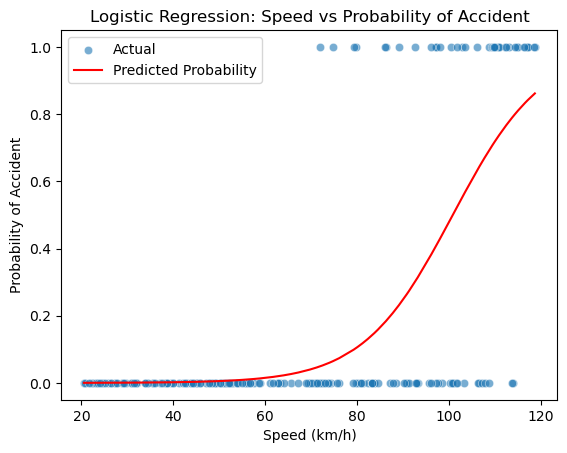

Accuracy: 0.88

Confusion Matrix:
 [[149  11]
 [ 13  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       160
           1       0.71      0.68      0.69        40

    accuracy                           0.88       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
#7.Predict Whether a Car Accident Occurs Based on Vehicle Speed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)

speed = np.random.uniform(20, 120, 200)

logits = -10 + 0.1 * speed
prob = 1 / (1 + np.exp(-logits))
accident = np.random.binomial(1, prob)
data = pd.DataFrame({
    "Speed": speed,
    "Prob_Accident": prob,
    "Accident": accident
})

X = data["Speed"].values.reshape(-1, 1)
y = data["Accident"].values

model = LogisticRegression()
model.fit(X, y)

data["Predicted_Prob"] = model.predict_proba(X)[:, 1]
data["Predicted_Class"] = model.predict(X)

sns.scatterplot(x="Speed", y="Accident", data=data, alpha=0.6, label="Actual")
sns.lineplot(x="Speed", y="Predicted_Prob", data=data, color="red", label="Predicted Probability")
plt.title("Logistic Regression: Speed vs Probability of Accident")
plt.xlabel("Speed (km/h)")
plt.ylabel("Probability of Accident")
plt.legend()
plt.show()

print("Accuracy:", accuracy_score(y, data["Predicted_Class"]))
print("\nConfusion Matrix:\n", confusion_matrix(y, data["Predicted_Class"]))
print("\nClassification Report:\n", classification_report(y, data["Predicted_Class"]))


Accuracy: 0.6013986013986014

Confusion Matrix:
 [[80  7]
 [50  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.92      0.74        87
           1       0.46      0.11      0.17        56

    accuracy                           0.60       143
   macro avg       0.54      0.51      0.46       143
weighted avg       0.56      0.60      0.52       143



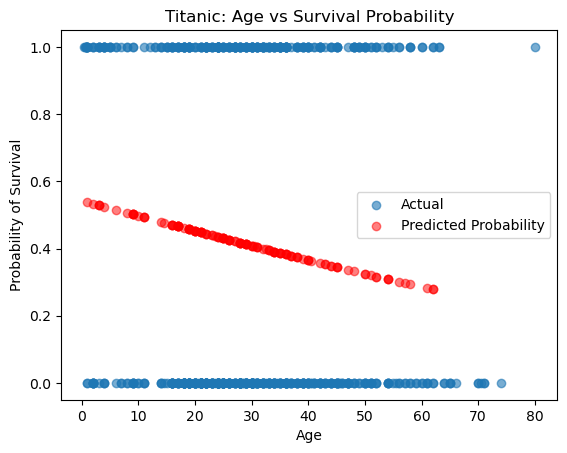

In [ ]:
#8.Predict Survival Using Passenger Age
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic").dropna(subset=["age", "survived"])

X = titanic["age"].values.reshape(-1, 1)
y = titanic["survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.scatter(titanic["age"], titanic["survived"], alpha=0.6, label="Actual")
plt.scatter(X_test, y_prob, color="red", alpha=0.5, label="Predicted Probability")
plt.title("Titanic: Age vs Survival Probability")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")
plt.legend()
plt.show()


Accuracy: 0.6293706293706294

Confusion Matrix:
 [[73 14]
 [39 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73        87
           1       0.55      0.30      0.39        56

    accuracy                           0.63       143
   macro avg       0.60      0.57      0.56       143
weighted avg       0.61      0.63      0.60       143



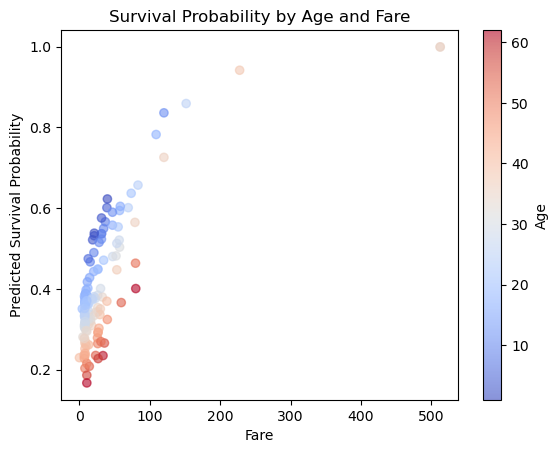

In [ ]:
#9.
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic").dropna(subset=["age", "fare", "survived"])

# Features and target
X = titanic[["age", "fare"]]
y = titanic["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.scatter(X_test["fare"], y_prob, c=X_test["age"], cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Age")
plt.xlabel("Fare")
plt.ylabel("Predicted Survival Probability")
plt.title("Survival Probability by Age and Fare")
plt.show()


Accuracy: 0.7821229050279329

Confusion Matrix:
 [[88 17]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



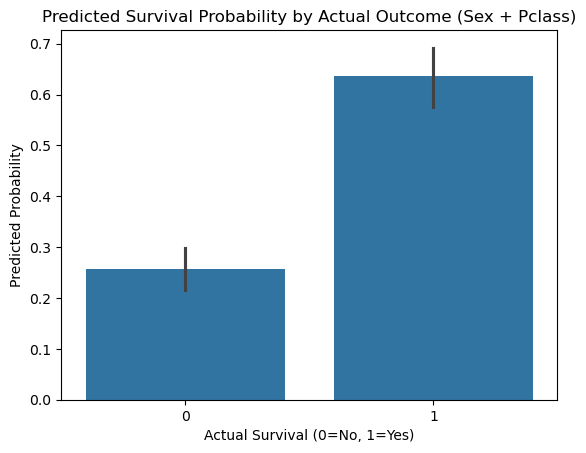

In [ ]:
#10.Predict Survival using Sex and Pclass

titanic = sns.load_dataset("titanic").dropna(subset=["sex", "pclass", "survived"])
X = titanic[["sex", "pclass"]]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables
y = titanic["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.barplot(x=y_test, y=y_prob)
plt.title("Predicted Survival Probability by Actual Outcome (Sex + Pclass)")
plt.xlabel("Actual Survival (0=No, 1=Yes)")
plt.ylabel("Predicted Probability")
plt.show()

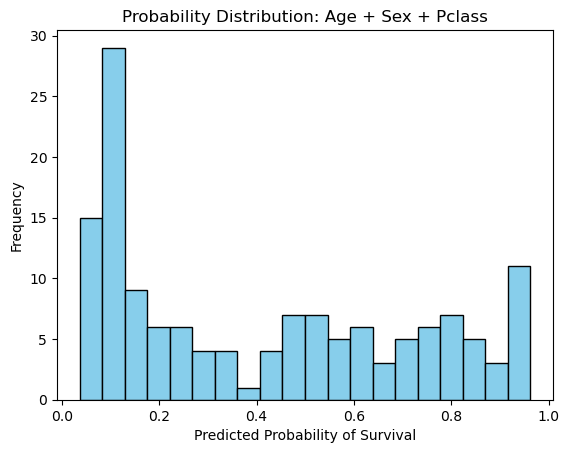

Accuracy: 0.7482517482517482


In [ ]:
#11.
titanic = sns.load_dataset("titanic").dropna(subset=["age", "sex", "pclass", "survived"])
X = titanic[["age", "sex", "pclass"]]
X = pd.get_dummies(X, drop_first=True)
y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

plt.hist(y_prob, bins=20, color='skyblue', edgecolor='black')
plt.title("Probability Distribution: Age + Sex + Pclass")
plt.xlabel("Predicted Probability of Survival")
plt.ylabel("Frequency")
plt.show()

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


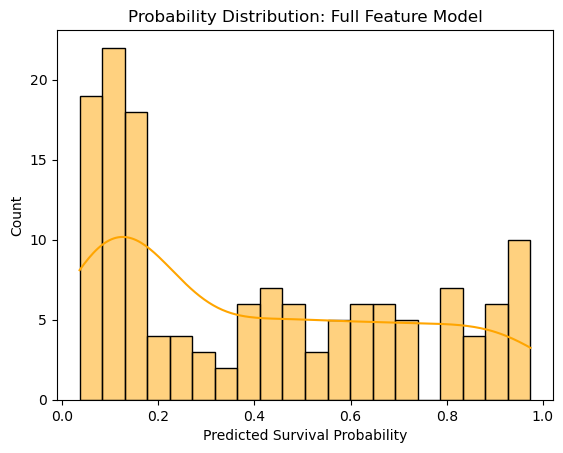

Accuracy: 0.7482517482517482

Confusion Matrix:
 [[71 16]
 [20 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [ ]:
#12.

titanic = sns.load_dataset("titanic").dropna(subset=["pclass", "sex", "age", "sibsp", "parch", "fare", "survived"])
X = titanic[["pclass", "sex", "age", "sibsp", "parch", "fare"]]
X = pd.get_dummies(X, drop_first=True)
y = titanic["survived"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

sns.histplot(y_prob, bins=20, kde=True, color="orange")
plt.title("Probability Distribution: Full Feature Model")
plt.xlabel("Predicted Survival Probability")
plt.ylabel("Count")
plt.show()

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, model.predict(X_test)))
print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test)))
